plots my data.
takes out all my data which isnt from savannahs.
I need to clean up my files so there is a clear progression of my data, so I dont get my workflow muddled

In [2]:
# Import libraries
import os
import glob
from osgeo import gdal
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import scipy.ndimage
import pandas as pd
import datetime as dt
import rasterio as rio
import re
import geopandas as gpd
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import earthpy.mask as em
from pyhdf.SD import SD, SDC
import pprint
import gdal
from gdalconst import *
import matplotlib.colors as colors 
from mpl_toolkits.axes_grid1 import make_axes_locatable 

In [3]:
# save text for analysis in another file - means I dont have to run through the code every time I want to analyse it
blanks_0203 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\0203_decrease_NDVI.csv")
blanks_0304 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\0304_decrease_NDVI.csv")
blanks_0405 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\0405_decrease_NDVI.csv")
blanks_0506 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\0506_decrease_NDVI.csv")
blanks_0607 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\0607_decrease_NDVI.csv")
blanks_0708 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\0708_decrease_NDVI.csv")
blanks_0809 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\0809_decrease_NDVI.csv")
blanks_0910 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\0910_decrease_NDVI.csv")
blanks_1011 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\1011_decrease_NDVI.csv")
blanks_1112 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\1112_decrease_NDVI.csv")
blanks_1213 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\1213_decrease_NDVI.csv")
blanks_1314 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\1314_decrease_NDVI.csv")
blanks_1415 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\1415_decrease_NDVI.csv")
blanks_1516 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\1516_decrease_NDVI.csv")
blanks_1617 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\1617_decrease_NDVI.csv")
blanks_1718 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\1718_decrease_NDVI.csv")
blanks_1819 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\1819_decrease_NDVI.csv")

In [4]:
VI_mean_2002 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2002.csv")
VI_mean_2003 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2003.csv")
VI_mean_2004 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2004.csv")
VI_mean_2005 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2005.csv")
VI_mean_2006 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2006.csv")
VI_mean_2007 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2007.csv")
VI_mean_2008 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2008.csv")
VI_mean_2009 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2009.csv")
VI_mean_2010 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2010.csv")
VI_mean_2011 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2011.csv")
VI_mean_2012 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2012.csv")
VI_mean_2013 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2013.csv")
VI_mean_2014 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2014.csv")
VI_mean_2015 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2015.csv")
VI_mean_2016 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2016.csv")
VI_mean_2017 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2017.csv")
VI_mean_2018 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2018.csv")
VI_mean_2019 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2019.csv")

In [5]:
LC_2002 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2002.csv")
LC_2003 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2003.csv")
LC_2004 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2004.csv")
LC_2005 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2005.csv")
LC_2006 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2006.csv")
LC_2007 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2007.csv")
LC_2008 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2008.csv")
LC_2009 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2009.csv")
LC_2010 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2010.csv")
LC_2011 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2011.csv")
LC_2012 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2012.csv")
LC_2013 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2013.csv")
LC_2014 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2014.csv")
LC_2015 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2015.csv")
LC_2016 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2016.csv")
LC_2017 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2017.csv")
LC_2018 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2018.csv")
LC_2019 = pd.read_csv("D:\\masters_data\\output\\csv\\NDVI\\LC_2019.csv")

In [6]:
VI_mean_2002[LC_2002==0] = np.nan
VI_mean_2003[LC_2003==0] = np.nan
VI_mean_2004[LC_2004==0] = np.nan
VI_mean_2005[LC_2005==0] = np.nan
VI_mean_2006[LC_2006==0] = np.nan
VI_mean_2007[LC_2007==0] = np.nan
VI_mean_2008[LC_2008==0] = np.nan
VI_mean_2009[LC_2009==0] = np.nan
VI_mean_2010[LC_2010==0] = np.nan
VI_mean_2011[LC_2011==0] = np.nan
VI_mean_2012[LC_2012==0] = np.nan
VI_mean_2013[LC_2013==0] = np.nan
VI_mean_2014[LC_2014==0] = np.nan
VI_mean_2015[LC_2015==0] = np.nan
VI_mean_2016[LC_2016==0] = np.nan
VI_mean_2017[LC_2017==0] = np.nan
VI_mean_2018[LC_2018==0] = np.nan

In [7]:
blanks_0203[LC_2002==0] = np.nan
blanks_0304[LC_2003==0] = np.nan
blanks_0405[LC_2004==0] = np.nan
blanks_0506[LC_2005==0] = np.nan
blanks_0607[LC_2006==0] = np.nan
blanks_0708[LC_2007==0] = np.nan
blanks_0809[LC_2008==0] = np.nan
blanks_0910[LC_2009==0] = np.nan
blanks_1011[LC_2010==0] = np.nan
blanks_1112[LC_2011==0] = np.nan
blanks_1213[LC_2012==0] = np.nan
blanks_1314[LC_2013==0] = np.nan
blanks_1415[LC_2014==0] = np.nan
blanks_1516[LC_2015==0] = np.nan
blanks_1617[LC_2016==0] = np.nan
blanks_1718[LC_2017==0] = np.nan
blanks_1819[LC_2018==0] = np.nan

In [8]:
decrease_0203 = round(np.nanmean(blanks_0203), 2)
decrease_0304 = round(np.nanmean(blanks_0304), 2)
decrease_0405 = round(np.nanmean(blanks_0405), 2)
decrease_0506 = round(np.nanmean(blanks_0506), 2)
decrease_0607 = round(np.nanmean(blanks_0607), 2)
decrease_0708 = round(np.nanmean(blanks_0708), 2)
decrease_0809 = round(np.nanmean(blanks_0809), 2)
decrease_0910 = round(np.nanmean(blanks_0910), 2)
decrease_1011 = round(np.nanmean(blanks_1011), 2)
decrease_1112 = round(np.nanmean(blanks_1112), 2)
decrease_1213 = round(np.nanmean(blanks_1213), 2)
decrease_1314 = round(np.nanmean(blanks_1314), 2)
decrease_1415 = round(np.nanmean(blanks_1415), 2)
decrease_1516 = round(np.nanmean(blanks_1516), 2)
decrease_1617 = round(np.nanmean(blanks_1617), 2)
decrease_1718 = round(np.nanmean(blanks_1718), 2)
decrease_1819 = round(np.nanmean(blanks_1819), 2)

In [9]:
standard_0203 = round(np.nanmean(VI_mean_2002), 2)
standard_0304 = round(np.nanmean(VI_mean_2003), 2)
standard_0405 = round(np.nanmean(VI_mean_2004), 2)
standard_0506 = round(np.nanmean(VI_mean_2005), 2)
standard_0607 = round(np.nanmean(VI_mean_2006), 2)
standard_0708 = round(np.nanmean(VI_mean_2007), 2)
standard_0809 = round(np.nanmean(VI_mean_2008), 2)
standard_0910 = round(np.nanmean(VI_mean_2009), 2)
standard_1011 = round(np.nanmean(VI_mean_2010), 2)
standard_1112 = round(np.nanmean(VI_mean_2011), 2)
standard_1213 = round(np.nanmean(VI_mean_2012), 2)
standard_1314 = round(np.nanmean(VI_mean_2013), 2)
standard_1415 = round(np.nanmean(VI_mean_2014), 2)
standard_1516 = round(np.nanmean(VI_mean_2015), 2)
standard_1617 = round(np.nanmean(VI_mean_2016), 2)
standard_1718 = round(np.nanmean(VI_mean_2017), 2)
standard_1819 = round(np.nanmean(VI_mean_2018), 2)

In [10]:
decrease = [decrease_0203, decrease_0304, decrease_0405, decrease_0506, decrease_0607,
    decrease_0708, decrease_0809,decrease_0910, decrease_1011, decrease_1112,
    decrease_1213, decrease_1314, decrease_1415,decrease_1516, decrease_1617,decrease_1718, decrease_1819
]

standard = [
    standard_0203, standard_0304, standard_0405, standard_0506, standard_0607,
    standard_0708, standard_0809,standard_0910, standard_1011, standard_1112,
    standard_1213, standard_1314, standard_1415, standard_1516, standard_1617,
    standard_1718, standard_1819
]


In [11]:
year = []
_sum = []
mean = []
_min = []
_max = []

for i in range(17):
    print("Year:  {}       sum: {}       mean: {}       min: {}       max: {}"
          . format(i +2002, standard[i].sum(), "{:.4f}".format(standard[i].sum()/ (2400*2400)), standard[i].min(), standard[i].max()))
    
    year.append(i+2002)
    _sum.append(standard[i].sum())
    mean.append("{:.4f}".format(standard[i].sum()/ (2400*2400)))
    _min.append(standard[i].min())
    _max.append(standard[i].max())
    

Year:  2002       sum: 152123.36       mean: 0.0264       min: 152123.36       max: 152123.36
Year:  2003       sum: 152411.54       mean: 0.0265       min: 152411.54       max: 152411.54
Year:  2004       sum: 152510.47       mean: 0.0265       min: 152510.47       max: 152510.47
Year:  2005       sum: 151035.99       mean: 0.0262       min: 151035.99       max: 151035.99
Year:  2006       sum: 153397.09       mean: 0.0266       min: 153397.09       max: 153397.09
Year:  2007       sum: 152999.44       mean: 0.0266       min: 152999.44       max: 152999.44
Year:  2008       sum: 152999.44       mean: 0.0266       min: 152999.44       max: 152999.44
Year:  2009       sum: 154201.89       mean: 0.0268       min: 154201.89       max: 154201.89
Year:  2010       sum: 153905.98       mean: 0.0267       min: 153905.98       max: 153905.98
Year:  2011       sum: 153034.24       mean: 0.0266       min: 153034.24       max: 153034.24
Year:  2012       sum: 149973.92       mean: 0.0260       mi

In [12]:
dates = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 20017, 2018]

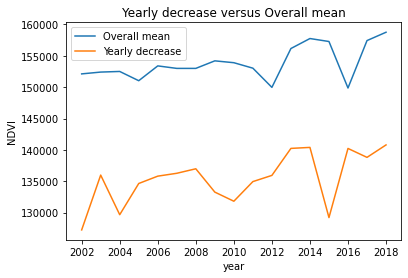

In [13]:
# line 1 points
x1 = year
y1 = standard
plt.plot(x1, y1, label = "Overall mean")

# line 2 points
x2 = year
y2 = decrease
plt.plot(x2, y2, label = "Yearly decrease")

plt.xlabel('year')
plt.ylabel('NDVI')

plt.title('Yearly decrease versus Overall mean')
plt.legend()
plt.show()

Not what we would expect to see. This says that the average NDVI for savannahs is lower in regions which experienced less burning than the year before compared to the mean. 

I think I know why this is. Places which have a decrease are still likely to be the high fire risk areas. The high fire risk areas are going to have a lower NDVI than the average savannahs. What I should do is create the categories like Niels suggested (Maybe 4 categories for the first 9 years, same for the last 9 years). I can then compare between categories and pixels that have changed from high frequency to lower frequency. I have also now got the mean canopy height working so that should probably be the priority to analyse.

In [14]:
# save text for analysis in another file - means I dont have to run through the code every time I want to analyse it
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\0203_decrease_NDVI.csv", blanks_0203, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\0304_decrease_NDVI.csv", blanks_0304, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\0405_decrease_NDVI.csv", blanks_0405, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\0506_decrease_NDVI.csv", blanks_0506, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\0607_decrease_NDVI.csv", blanks_0607, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\0708_decrease_NDVI.csv", blanks_0708, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\0809_decrease_NDVI.csv", blanks_0809, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\0910_decrease_NDVI.csv", blanks_0910, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\1011_decrease_NDVI.csv", blanks_1011, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\1112_decrease_NDVI.csv", blanks_1112, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\1213_decrease_NDVI.csv", blanks_1213, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\1314_decrease_NDVI.csv", blanks_1314, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\1415_decrease_NDVI.csv", blanks_1415, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\1516_decrease_NDVI.csv", blanks_1516, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\1617_decrease_NDVI.csv", blanks_1617, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\1718_decrease_NDVI.csv", blanks_1718, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\1819_decrease_NDVI.csv", blanks_1819, delimiter=",")

In [15]:
# save text for analysis in another file - means I dont have to run through the code every time I want to analyse it
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2002.csv", VI_mean_2002, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2003.csv", VI_mean_2003, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2004.csv", VI_mean_2004, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2005.csv", VI_mean_2005, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2006.csv", VI_mean_2006, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2007.csv", VI_mean_2007, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2008.csv", VI_mean_2007, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2009.csv", VI_mean_2009, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2010.csv", VI_mean_2010, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2011.csv", VI_mean_2011, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2012.csv", VI_mean_2012, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2013.csv", VI_mean_2013, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2014.csv", VI_mean_2014, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2015.csv", VI_mean_2015, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2016.csv", VI_mean_2016, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2017.csv", VI_mean_2017, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2018.csv", VI_mean_2018, delimiter=",")
np.savetxt("D:\\masters_data\\output\\csv\\NDVI\\VI_blanks_2019.csv", VI_mean_2019, delimiter=",")